# Stroke Prediction

## Exploratory Data Analysis

### Data Preprocessing

The unique identifier “id” attribute is dropped

There are observations with empty BMI attribute, which we replace with the mean BMI

The dataset contains categorical attributes including gender, ever_married, work_type, Residence_type, smoking_status, where we apply ordinal encoding on them

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display

# load dataset
df = pd.read_csv('data.csv')
display(df.head(5))

# drop the column id
df = df.drop(columns=['id'])

# for each of the categorical attributes, print out all the unique elements.
print("Unique elements of categorical attributes:")
cats = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for cat in cats:
    print(df[cat].unique()) 

# Find and print out which columns/attributes that have empty values, e.g., NA, NaN, null, None.
print("\nColumns with empty values: ", df.columns[df.isna().any()]) # bmi
# Fill bmi with mean
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
print(df.shape)

# For each of the categorical attribtues, encode the set of categories to be 0 ~ (n_classes - 1)
encoder = OrdinalEncoder()
df[cats] = encoder.fit_transform(df[cats])

# Create a dictionary to hold mappings
category_mappings = {}
for i, column in enumerate(cats):
    categories = encoder.categories_[i]
    mapping = {category: int(code) for code, category in enumerate(categories)}
    category_mappings[column] = mapping

for key in category_mappings:
    print(key, category_mappings[key])

display(df.head(5))

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Unique elements of categorical attributes:
['Male' 'Female' 'Other']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']

Columns with empty values:  Index(['bmi'], dtype='object')
(5110, 11)
gender {'Female': 0, 'Male': 1, 'Other': 2}
ever_married {'No': 0, 'Yes': 1}
work_type {'Govt_job': 0, 'Never_worked': 1, 'Private': 2, 'Self-employed': 3, 'children': 4}
Residence_type {'Rural': 0, 'Urban': 1}
smoking_status {'Unknown': 0, 'formerly smoked': 1, 'never smoked': 2, 'smokes': 3}


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,0,1,1.0,2.0,1.0,228.69,36.600000,1.0,1
1,0.0,61.0,0,0,1.0,3.0,0.0,202.21,28.893237,2.0,1
2,1.0,80.0,0,1,1.0,2.0,0.0,105.92,32.500000,2.0,1
3,0.0,49.0,0,0,1.0,2.0,1.0,171.23,34.400000,3.0,1
4,0.0,79.0,1,0,1.0,3.0,0.0,174.12,24.000000,2.0,1


### Distribution of Attribute Plots

gender {'Female': 0, 'Male': 1, 'Other': 2}
ever_married {'No': 0, 'Yes': 1}
work_type {'Govt_job': 0, 'Never_worked': 1, 'Private': 2, 'Self-employed': 3, 'children': 4}
Residence_type {'Rural': 0, 'Urban': 1}
smoking_status {'Unknown': 0, 'formerly smoked': 1, 'never smoked': 2, 'smokes': 3}


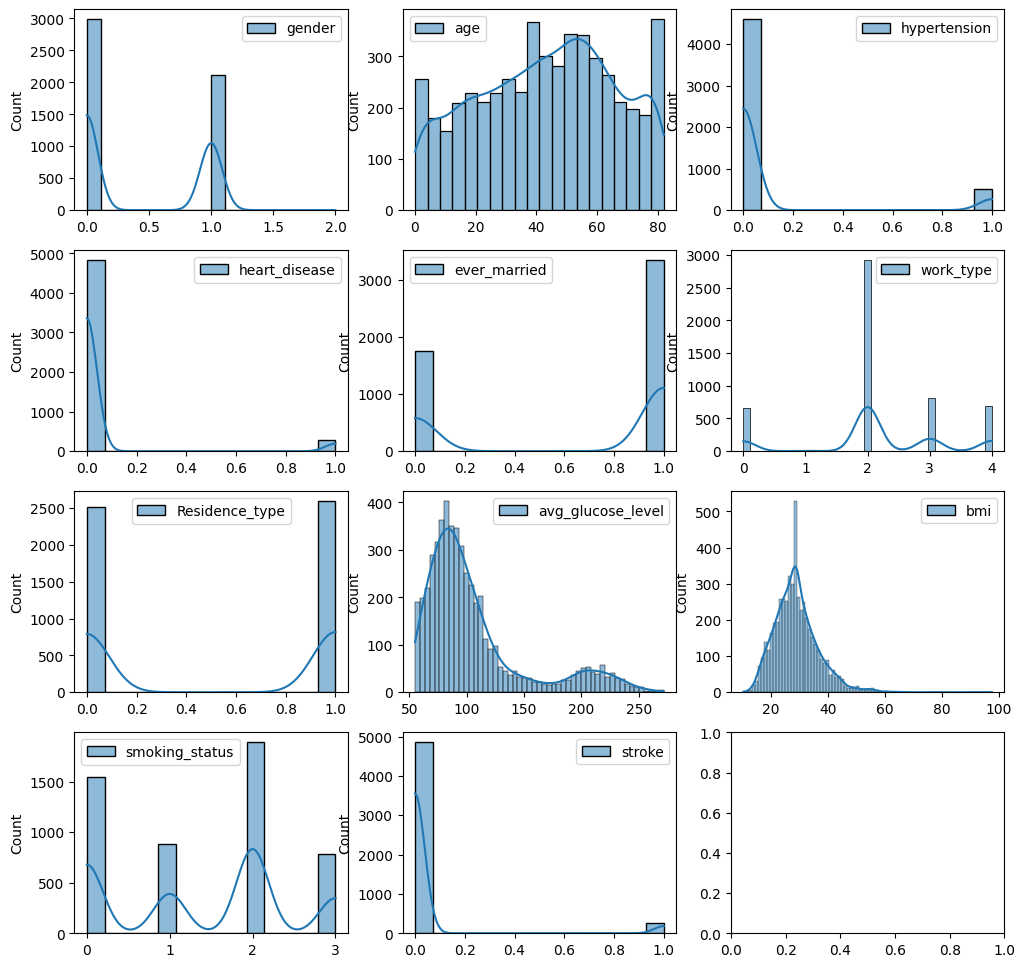

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot the distribution of data
fig, axes = plt.subplots(4,3, figsize=(12,12))
axes = axes.flatten()

# Loop to create subplots
i = 0
for item in df.items():
    sns.histplot(item, kde=True, ax=axes[i])
    i+=1
    
for key in category_mappings:
    print(key, category_mappings[key])
plt.show()

Most patients do not have hypertension, heart_disease, or stroke.

average_glucose_level follow a right skewed distribution

Other attributes follow a roughly uniform distribution.

### Correlation Map

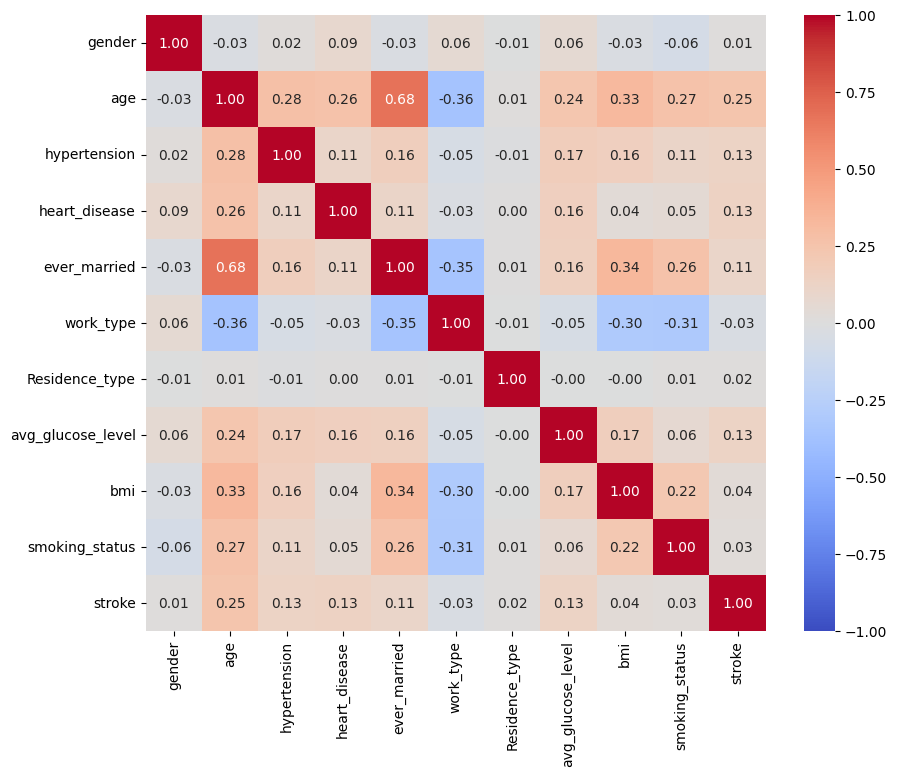

In [3]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.show()

Small correlation between stroke and age, hypertension, heart_disease, avg_glucose_level.

Noticeable correlation between age and all other attributes except gender and residence type.

### Attribute Pair Plots

gender {'Female': 0, 'Male': 1, 'Other': 2}
ever_married {'No': 0, 'Yes': 1}
work_type {'Govt_job': 0, 'Never_worked': 1, 'Private': 2, 'Self-employed': 3, 'children': 4}
Residence_type {'Rural': 0, 'Urban': 1}
smoking_status {'Unknown': 0, 'formerly smoked': 1, 'never smoked': 2, 'smokes': 3}


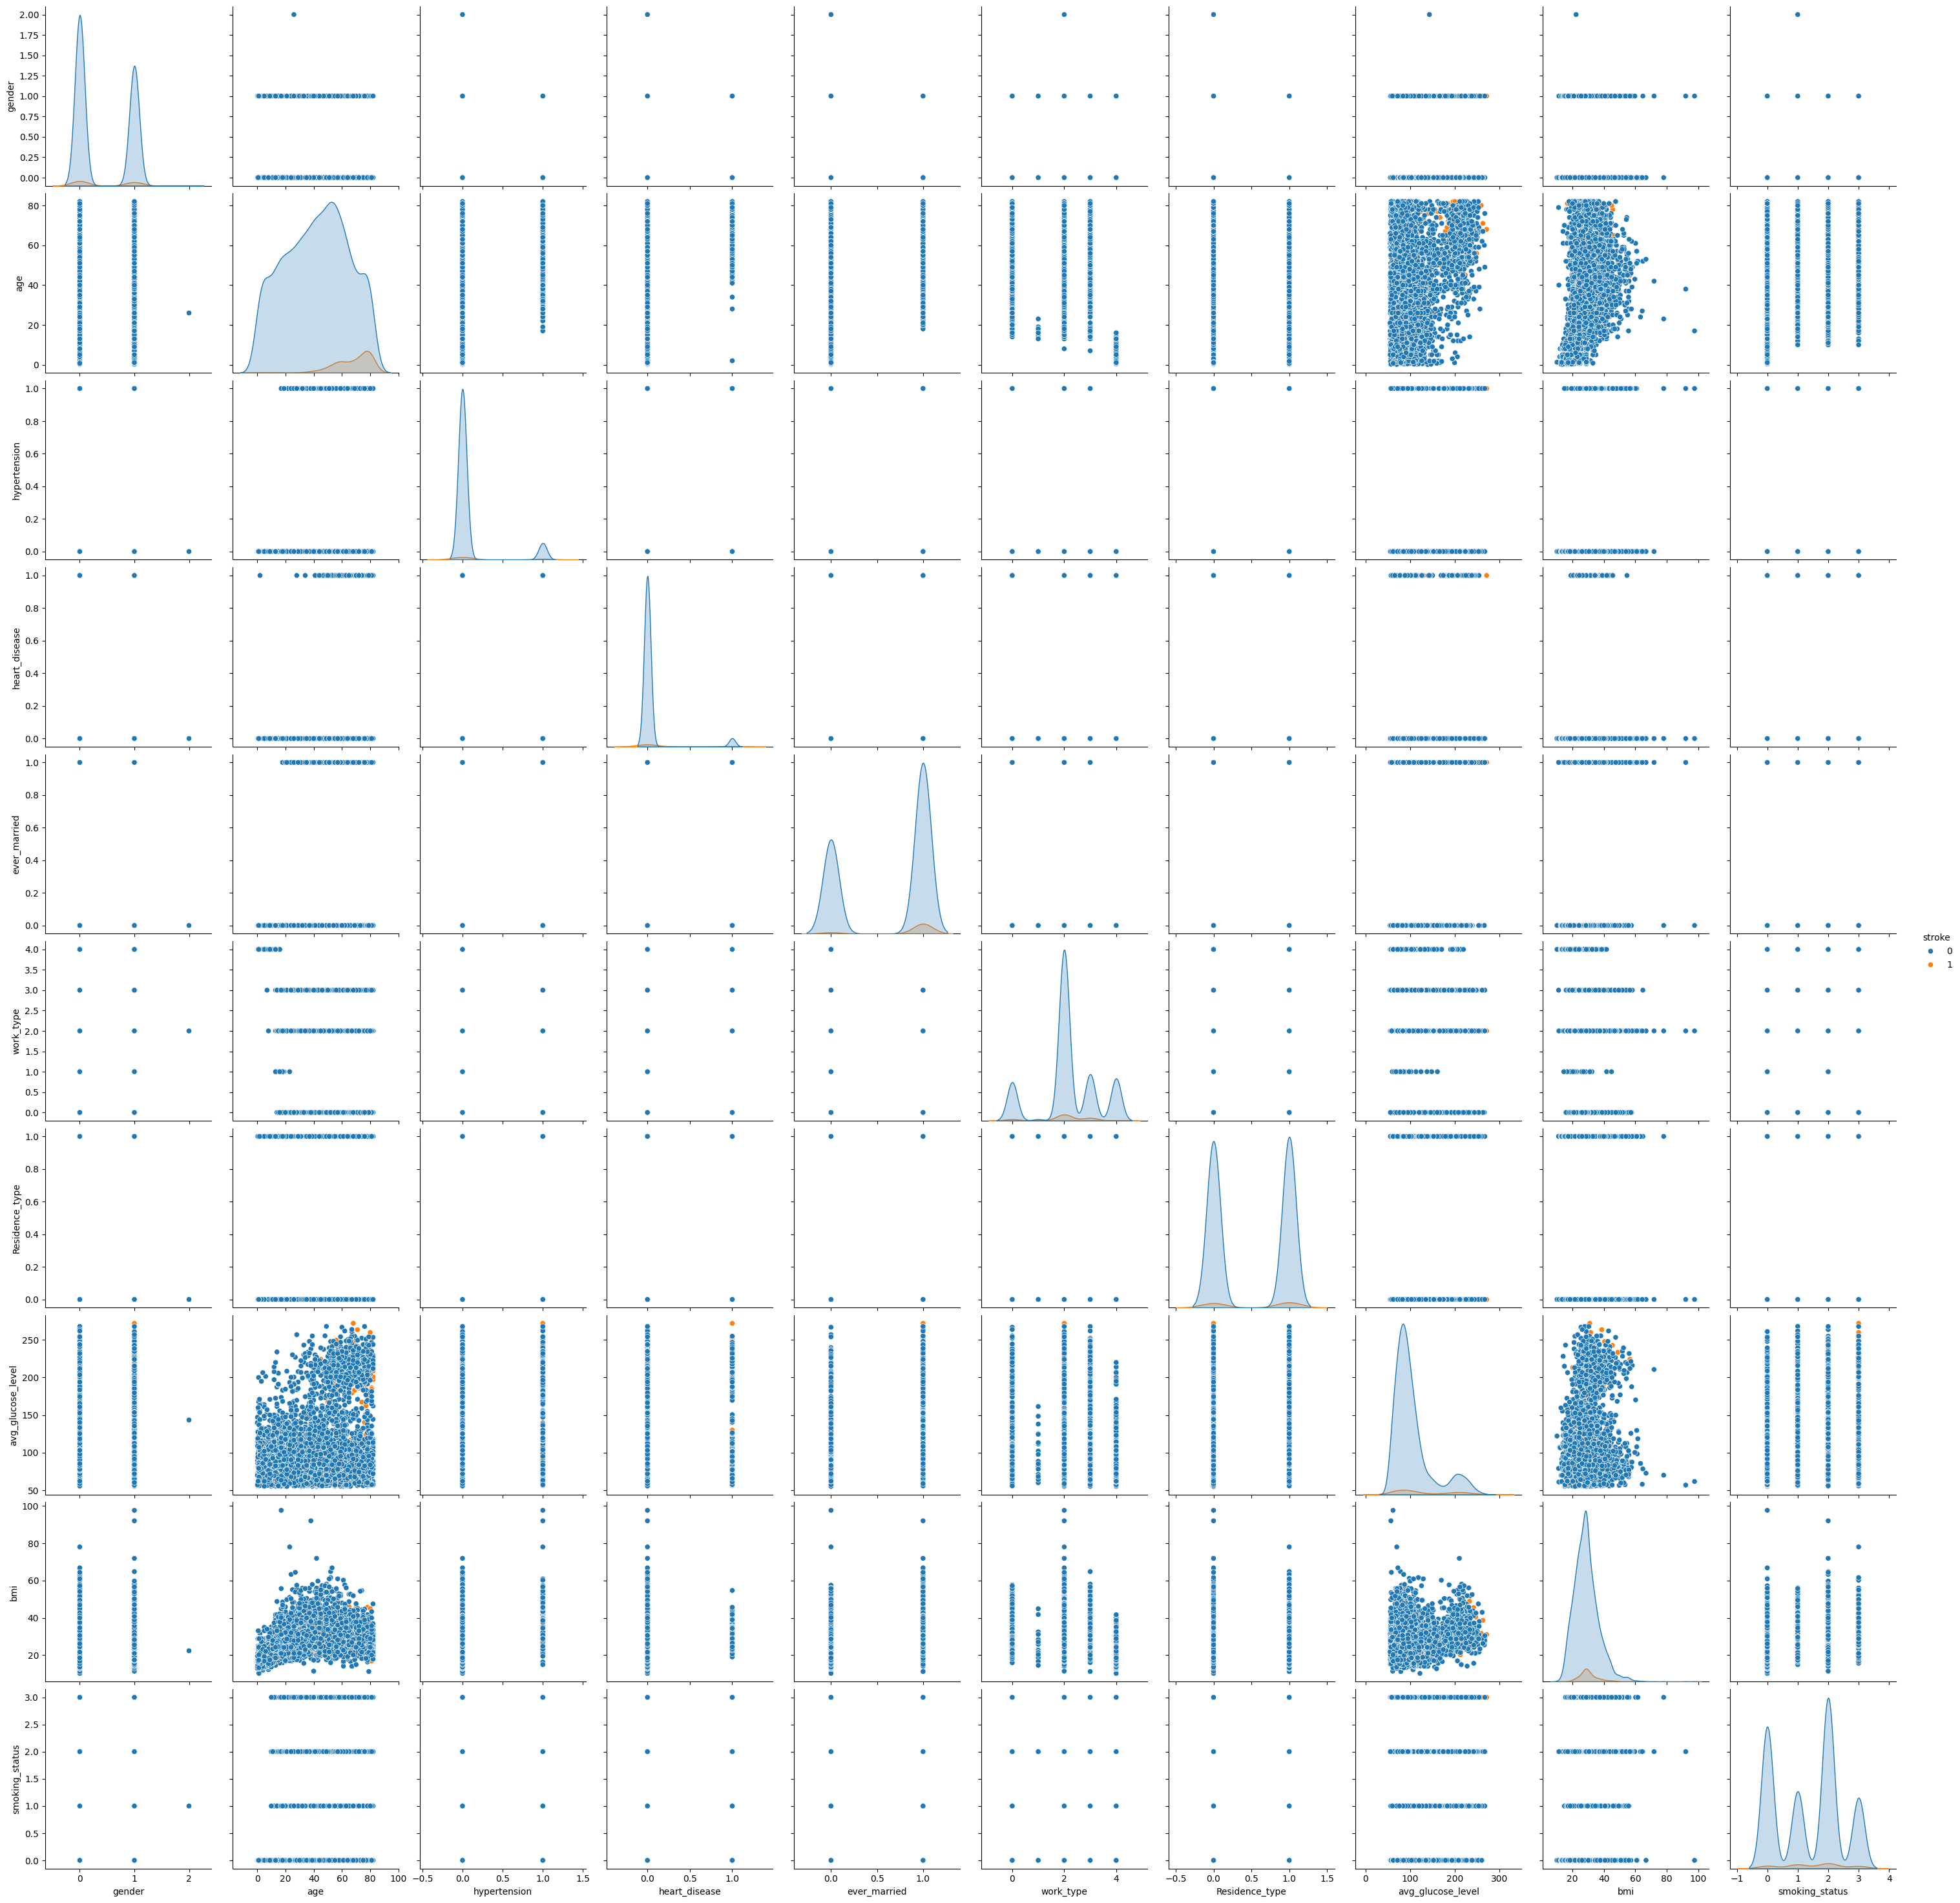

In [4]:
# points colored based on the column stroke
sns.pairplot(df, hue="stroke", height=3)
for key in category_mappings:
    print(key, category_mappings[key])
plt.show()

### Attribute Density Plot

gender {'Female': 0, 'Male': 1, 'Other': 2}
ever_married {'No': 0, 'Yes': 1}
work_type {'Govt_job': 0, 'Never_worked': 1, 'Private': 2, 'Self-employed': 3, 'children': 4}
Residence_type {'Rural': 0, 'Urban': 1}
smoking_status {'Unknown': 0, 'formerly smoked': 1, 'never smoked': 2, 'smokes': 3}


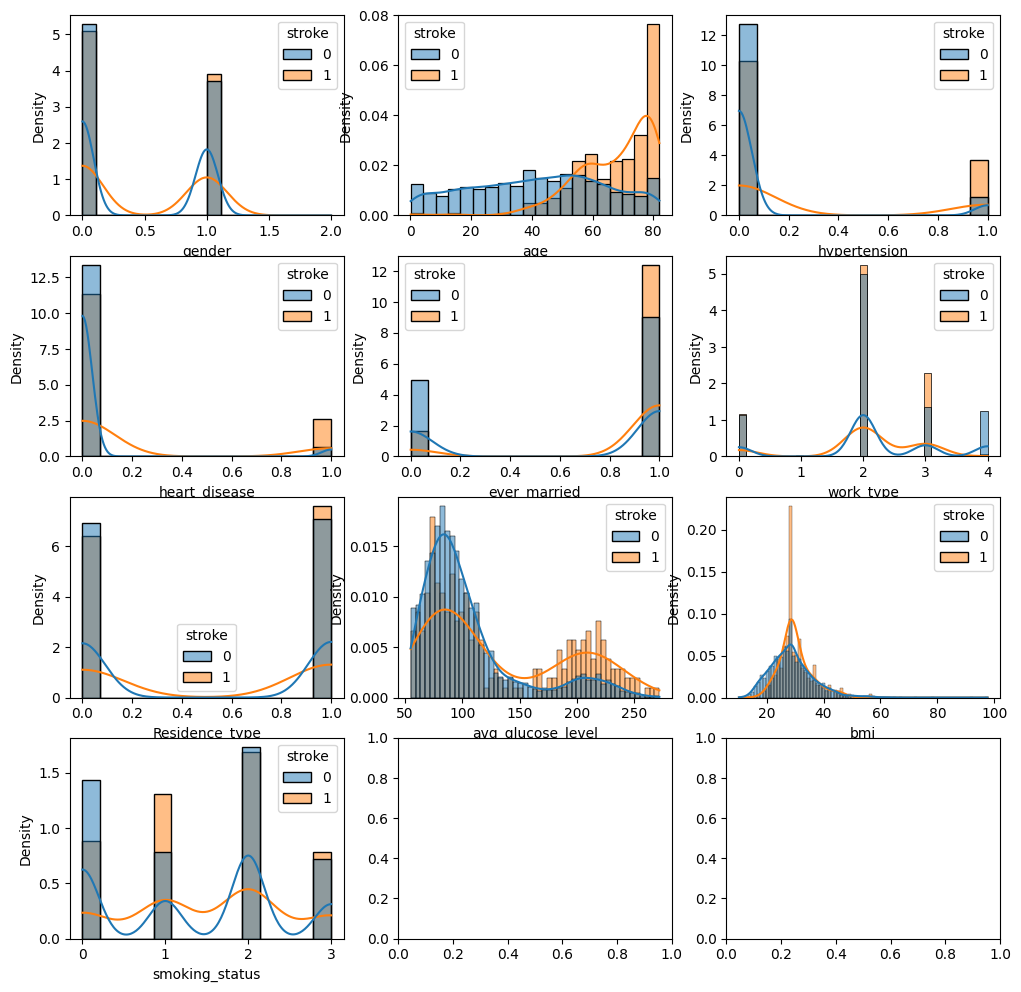

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot the distribution of data
fig, axes = plt.subplots(4,3, figsize=(12,12))
axes = axes.flatten()

# Loop to create subplots
for i, col in enumerate(df.drop(columns='stroke').columns):
    sns.histplot(data=df, x=col, hue="stroke", ax=axes[i], kde=True, common_norm=False, stat="density")

for key in category_mappings:
    print(key, category_mappings[key])

plt.show()

Strong predictors: age (60-100), heart_disease, hypertension, avg_glucose_level (150+)

Moderate predictors: smoking_status (formerly smoked followed by smokes), work_type (self employed followed by private workers), bmi (highest risk between 25-30)

Weak predictors: gender, ever_married residence_type

## Machine Learning Model

Normalize numerical data using the min-max normalization technique

Split into training and test sets 80:20.

Apply SMOTE on training data.

In [2]:
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# normalize numerical data using the min-max normalization technique
num = ["age", "avg_glucose_level", "bmi"]
scaler = MinMaxScaler(feature_range=(0, 1))
df[num] = scaler.fit_transform(df[num])

# Split data into features and target
X = df.drop('stroke', axis=1)
y = df['stroke']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
x_os, y_os = smote.fit_resample(X_train, y_train)
print(y_os.value_counts())
df.head(5)

stroke
0    3901
1    3901
Name: count, dtype: int64


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,0.816895,0,1,1.0,2.0,1.0,0.801265,0.301260,1.0,1
1,0.0,0.743652,0,0,1.0,3.0,0.0,0.679023,0.212981,2.0,1
2,1.0,0.975586,0,1,1.0,2.0,0.0,0.234512,0.254296,2.0,1
3,0.0,0.597168,0,0,1.0,2.0,1.0,0.536008,0.276060,3.0,1
4,0.0,0.963379,1,0,1.0,3.0,0.0,0.549349,0.156930,2.0,1


### Random Forest

In [4]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [300, 500, 1000],
    'max_depth': [5, 10, None],
}
grid_search = GridSearchCV(rf, param_grid)
grid_search.fit(x_os,y_os)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("Optimal Hyper-parameters : ", grid_search.best_params_)
print("Optimal Accuracy : ", grid_search.best_score_)
print("Test Accuracy: ", accuracy_score(y_test, y_pred))
print("Mean Squared Error : ", mean_squared_error(y_test, y_pred))
print(classification_report(y_test, y_pred))

Optimal Hyper-parameters :  {'max_depth': None, 'n_estimators': 300}
Optimal Accuracy :  0.9396333711131917
Test Accuracy:  0.8776908023483366
Mean Squared Error :  0.1223091976516634
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       960
           1       0.12      0.16      0.14        62

    accuracy                           0.88      1022
   macro avg       0.53      0.54      0.54      1022
weighted avg       0.89      0.88      0.89      1022



### Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

cls = LogisticRegression()

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter': [100, 200, 300]
}

grid_search = GridSearchCV(cls, param_grid)
grid_search.fit(x_os, y_os)

best_cls = grid_search.best_estimator_
y_pred = best_cls.predict(X_test)

print("Optimal Hyper-parameters : ", grid_search.best_params_)
print("Optimal Accuracy : ", grid_search.best_score_)
print("Test Accuracy: ", accuracy_score(y_test, y_pred))
print("Mean Squared Error : ", mean_squared_error(y_test, y_pred))
print(classification_report(y_test, y_pred))

Optimal Hyper-parameters :  {'C': 1, 'max_iter': 100, 'solver': 'newton-cg'}
Optimal Accuracy :  0.7880047306953136
Test Accuracy:  0.7544031311154599
Mean Squared Error :  0.2455968688845401
              precision    recall  f1-score   support

           0       0.98      0.76      0.85       960
           1       0.16      0.73      0.26        62

    accuracy                           0.75      1022
   macro avg       0.57      0.74      0.56      1022
weighted avg       0.93      0.75      0.82      1022



### SVM Classifier

In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1] 
}

grid_search = GridSearchCV(SVC(), param_grid)
grid_search.fit(x_os, y_os)
best_svc = grid_search.best_estimator_
y_pred = best_svc.predict(X_test)

print("Optimal Hyper-parameters : ", grid_search.best_params_)
print("Optimal Accuracy : ", grid_search.best_score_)
print("Test Accuracy: ", accuracy_score(y_test, y_pred))
print("Mean Squared Error : ", mean_squared_error(y_test, y_pred))
print(classification_report(y_test, y_pred))

Optimal Hyper-parameters :  {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Optimal Accuracy :  0.9107941983278305
Test Accuracy:  0.8317025440313112
Mean Squared Error :  0.16829745596868884
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       960
           1       0.11      0.26      0.16        62

    accuracy                           0.83      1022
   macro avg       0.53      0.56      0.53      1022
weighted avg       0.90      0.83      0.86      1022



### Multi-layer Perception

In [20]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

param_grid = {
    "max_iter" : [500, 600, 1000],
    "hidden_layer_sizes" : [(15, 12, 7), (23, 17, 13), (50, 35, 20)],
    "learning_rate_init" : 0.15 * np.arange(1, 3)
}

grid_search = GridSearchCV(mlp, param_grid)
grid_search.fit(x_os,y_os)
best_mlp = grid_search.best_estimator_
y_pred = best_mlp.predict(X_test)

print("Optimal Hyper-parameters : ", grid_search.best_params_)
print("Optimal Accuracy : ", grid_search.best_score_)
print("Test Accuracy: ", accuracy_score(y_test, y_pred))
print("Mean Squared Error : ", mean_squared_error(y_test, y_pred))
print(classification_report(y_test, y_pred))

Optimal Hyper-parameters :  {'hidden_layer_sizes': (23, 17, 13), 'learning_rate_init': 0.15, 'max_iter': 1000}
Optimal Accuracy :  0.7810831321145223
Test Accuracy:  0.6614481409001957
Mean Squared Error :  0.3385518590998043
              precision    recall  f1-score   support

           0       0.99      0.65      0.78       960
           1       0.14      0.87      0.24        62

    accuracy                           0.66      1022
   macro avg       0.56      0.76      0.51      1022
weighted avg       0.94      0.66      0.75      1022



### Gaussian Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

grid_search = GridSearchCV(gnb, param_grid, cv=5)
grid_search.fit(x_os, y_os)
best_gnb = grid_search.best_estimator_
y_pred = best_gnb.predict(X_test)

print("Optimal Hyper-parameters : ", grid_search.best_params_)
print("Optimal Accuracy : ", grid_search.best_score_)
print("Test Accuracy: ", accuracy_score(y_test, y_pred))
print("Mean Squared Error : ", mean_squared_error(y_test, y_pred))
print(classification_report(y_test, y_pred))

Optimal Hyper-parameters :  {'var_smoothing': 0.0001519911082952933}
Optimal Accuracy :  0.762755876410585
Test Accuracy:  0.6800391389432485
Mean Squared Error :  0.3199608610567515
              precision    recall  f1-score   support

           0       0.99      0.67      0.80       960
           1       0.14      0.85      0.24        62

    accuracy                           0.68      1022
   macro avg       0.56      0.76      0.52      1022
weighted avg       0.94      0.68      0.76      1022



### K Nearest Neighbors

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'] 
}

grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(x_os, y_os)
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

print("Optimal Hyper-parameters : ", grid_search.best_params_)
print("Optimal Accuracy : ", grid_search.best_score_)
print("Test Accuracy: ", accuracy_score(y_test, y_pred))
print("Mean Squared Error : ", mean_squared_error(y_test, y_pred))
print(classification_report(y_test, y_pred))

Optimal Hyper-parameters :  {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Optimal Accuracy :  0.9207907488624978
Test Accuracy:  0.8317025440313112
Mean Squared Error :  0.16829745596868884
              precision    recall  f1-score   support

           0       0.95      0.86      0.91       960
           1       0.13      0.32      0.19        62

    accuracy                           0.83      1022
   macro avg       0.54      0.59      0.55      1022
weighted avg       0.90      0.83      0.86      1022



### Stacking Approach

Use optimal hyperparameters for each model.

In [3]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

base_models = [
    ('rf', RandomForestClassifier(n_estimators=1000, max_depth=None)),
    ('lr', LogisticRegression(C=1, max_iter=100, solver='newton-cg')),
    ('svc_rbf', SVC(C=100, gamma=1, kernel='rbf')),
    ('gnb', GaussianNB(var_smoothing=0.000152)),
    ('knn', KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')),
    ('mlp', MLPClassifier(hidden_layer_sizes=(23, 17, 13), learning_rate_init=0.15, max_iter=1000))
]

final_estimator = LogisticRegression()
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=final_estimator)

stacking_classifier.fit(x_os, y_os)
y_pred = stacking_classifier.predict(X_test)

print("Test Accuracy: ", accuracy_score(y_test, y_pred))
print("Mean Squared Error : ", mean_squared_error(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test Accuracy:  0.9021526418786693
Mean Squared Error :  0.09784735812133072
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       960
           1       0.12      0.10      0.11        62

    accuracy                           0.90      1022
   macro avg       0.53      0.53      0.53      1022
weighted avg       0.89      0.90      0.90      1022



## Results

Random Forest model achieved the best outcome, at 88% accuracy.

This is followed by K Nearest Neighbors (83%),  SVM Classifier (83%), Logistic Regression (75%), Gaussian Naive Bayes (68%), Multi-layer Perceptron (66%).

By applying multiple algorithms using a stacking approach, we were able to achieve the highest accuracy of 90%.